## Orders Analysis

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:

orders = pd.read_csv(r"D:\super store sales\super store sales\Orders.csv", encoding='latin1')
managers = pd.read_csv(r"D:\super store sales\super store sales\Managers.csv", encoding='utf-8-sig')
returns = pd.read_csv(r"D:\super store sales\super store sales\Returns.csv")


In [3]:
orders.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7981,CA-2014-103800,03-01-2014,07-01-2014,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2014-112326,04-01-2014,08-01-2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,741,CA-2014-112326,04-01-2014,08-01-2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748


In [4]:
managers.head()

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


In [5]:
returns.head()

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         1993 non-null   int64  
 1   Order ID       1993 non-null   object 
 2   Order Date     1993 non-null   object 
 3   Ship Date      1993 non-null   object 
 4   Ship Mode      1993 non-null   object 
 5   Customer ID    1993 non-null   object 
 6   Customer Name  1993 non-null   object 
 7   Segment        1993 non-null   object 
 8   Country        1993 non-null   object 
 9   City           1993 non-null   object 
 10  State          1993 non-null   object 
 11  Postal Code    1993 non-null   int64  
 12  Region         1993 non-null   object 
 13  Product ID     1993 non-null   object 
 14  Category       1993 non-null   object 
 15  Sub-Category   1993 non-null   object 
 16  Product Name   1993 non-null   object 
 17  Sales          1993 non-null   float64
 18  Quantity

In [7]:
orders.columns = (orders.columns.str.strip().str.replace(' ', '_').str.replace('-', '_').str.lower())

In [8]:
orders.head(3)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,7981,CA-2014-103800,03-01-2014,07-01-2014,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2014-112326,04-01-2014,08-01-2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,741,CA-2014-112326,04-01-2014,08-01-2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748


In [9]:
managers.columns = (managers.columns.str.strip().str.lower())

In [10]:
managers.head()

,person,region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


### Loading year-wise data (2015, 2016, 2017)

In [11]:
orders_2015 = pd.read_csv(r"D:\super store sales\super store sales\Orders 2015.csv", encoding='latin1')
orders_2016 = pd.read_csv(r"D:\super store sales\super store sales\Orders 2016.csv", encoding='latin1')
orders_2017 = pd.read_csv(r"D:\super store sales\super store sales\Order 2017.csv", encoding='latin1')

In [12]:
orders_2015.columns == orders_2016.columns 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [13]:
orders_all = pd.concat([orders_2015, orders_2016, orders_2017], ignore_index=True)

In [14]:
orders_all.columns = (orders_all.columns.str.strip().str.replace(' ', '_').str.replace('-', '_').str.lower())

In [15]:
orders_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8001 entries, 0 to 8000
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         8001 non-null   int64  
 1   order_id       8001 non-null   object 
 2   order_date     8001 non-null   object 
 3   ship_date      8001 non-null   object 
 4   ship_mode      8001 non-null   object 
 5   customer_id    8001 non-null   object 
 6   customer_name  8001 non-null   object 
 7   segment        8001 non-null   object 
 8   country        8001 non-null   object 
 9   city           8001 non-null   object 
 10  state          8001 non-null   object 
 11  postal_code    8001 non-null   int64  
 12  region         8001 non-null   object 
 13  product_id     8001 non-null   object 
 14  category       8001 non-null   object 
 15  sub_category   8001 non-null   object 
 16  product_name   8001 non-null   object 
 17  sales          8001 non-null   float64
 18  quantity

In [16]:
orders_all.order_date.min(), orders_all.order_date.max()

('01-01-2017', '31-12-2016')

#### Making the full df 


In [17]:
returns.columns = (returns.columns.str.strip().str.replace(' ', '_').str.lower())

In [18]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   returned  296 non-null    object
 1   order_id  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [19]:
orders_return = pd.merge(orders_all, returns, on="order_id", how="left")

In [20]:
managers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   person  4 non-null      object
 1   region  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


In [21]:
full_df = pd.merge(orders_return, managers, on='region', how='left')

In [22]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8001 entries, 0 to 8000
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         8001 non-null   int64  
 1   order_id       8001 non-null   object 
 2   order_date     8001 non-null   object 
 3   ship_date      8001 non-null   object 
 4   ship_mode      8001 non-null   object 
 5   customer_id    8001 non-null   object 
 6   customer_name  8001 non-null   object 
 7   segment        8001 non-null   object 
 8   country        8001 non-null   object 
 9   city           8001 non-null   object 
 10  state          8001 non-null   object 
 11  postal_code    8001 non-null   int64  
 12  region         8001 non-null   object 
 13  product_id     8001 non-null   object 
 14  category       8001 non-null   object 
 15  sub_category   8001 non-null   object 
 16  product_name   8001 non-null   object 
 17  sales          8001 non-null   float64
 18  quantity

In [23]:
full_df.isnull().sum()

row_id              0
order_id            0
order_date          0
ship_date           0
ship_mode           0
customer_id         0
customer_name       0
segment             0
country             0
city                0
state               0
postal_code         0
region              0
product_id          0
category            0
sub_category        0
product_name        0
sales               0
quantity            0
discount            0
profit              0
returned         7352
person              0
dtype: int64

In [24]:
full_df.tail(3)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,returned,person
7998,1297,CA-2017-115427,30-12-2017,03-01-2018,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,Yes,Anna Andreadi
7999,1298,CA-2017-115427,30-12-2017,03-01-2018,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750,Yes,Anna Andreadi
8000,5092,CA-2017-156720,30-12-2017,03-01-2018,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,NaN,Anna Andreadi


## EDA (Exploring Data Analysis)

### Sales per category

In [25]:
full_df['category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [26]:
category = full_df.category.value_counts()
category

category
Office Supplies    4809
Furniture          1700
Technology         1492
Name: count, dtype: int64

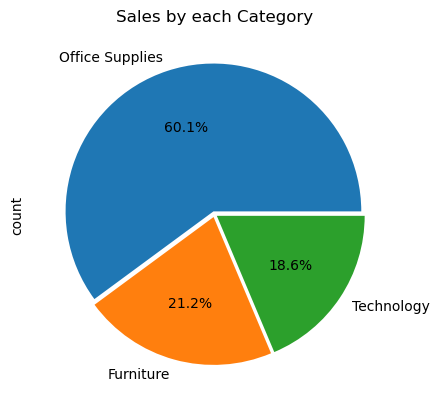

In [27]:
category.plot(kind='pie', color= 'bgr', autopct='%1.1f%%', explode=(0.02,0.02,0.02), title="Sales by each Category")
plt.show()

In [28]:
category_sales = full_df.groupby('category')['sales'].sum().sort_values(ascending=False)
category_sales

category
Technology         660875.8000
Furniture          584806.9422
Office Supplies    567270.6200
Name: sales, dtype: float64

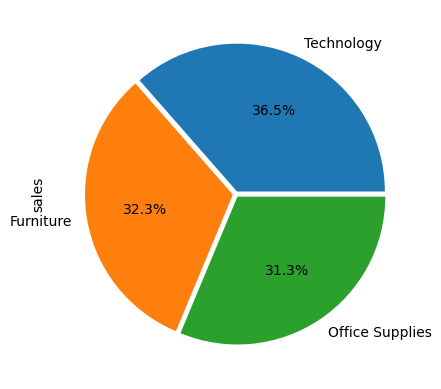

In [29]:
plt.Figure(figsize=(10,6))

category_sales.plot(kind='pie', color= 'bgr', autopct='%1.1f%%', explode=(0.02,0.02,0.02))
plt.show()

In [30]:
full_df.head(3)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,returned,person
0,213,CA-2015-146262,02-01-2015,09-01-2015,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,Ohio,44256,East,OFF-LA-10004544,Office Supplies,Labels,Avery 505,23.680,2,0.2,8.8800,Yes,Chuck Magee
1,214,CA-2015-146262,02-01-2015,09-01-2015,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,Ohio,44256,East,FUR-BO-10004695,Furniture,Bookcases,O'Sullivan 2-Door Barrister Bookcase in Odessa...,452.450,5,0.5,-244.3230,Yes,Chuck Magee
2,215,CA-2015-146262,02-01-2015,09-01-2015,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,Ohio,44256,East,TEC-PH-10002844,Technology,Phones,Speck Products Candyshell Flip Case,62.982,3,0.4,-14.6958,Yes,Chuck Magee


In [31]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8001 entries, 0 to 8000
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         8001 non-null   int64  
 1   order_id       8001 non-null   object 
 2   order_date     8001 non-null   object 
 3   ship_date      8001 non-null   object 
 4   ship_mode      8001 non-null   object 
 5   customer_id    8001 non-null   object 
 6   customer_name  8001 non-null   object 
 7   segment        8001 non-null   object 
 8   country        8001 non-null   object 
 9   city           8001 non-null   object 
 10  state          8001 non-null   object 
 11  postal_code    8001 non-null   int64  
 12  region         8001 non-null   object 
 13  product_id     8001 non-null   object 
 14  category       8001 non-null   object 
 15  sub_category   8001 non-null   object 
 16  product_name   8001 non-null   object 
 17  sales          8001 non-null   float64
 18  quantity

In [32]:
full_df.profit.unique()

array([   8.88  , -244.323 ,  -14.6958, ...,   19.791 ,    6.475 ,
         -0.6048])

In [33]:
category_profits = full_df.groupby('category')['profit'].sum()
category_profits

category
Furniture           12993.5473
Office Supplies     99897.3847
Technology         123962.1156
Name: profit, dtype: float64

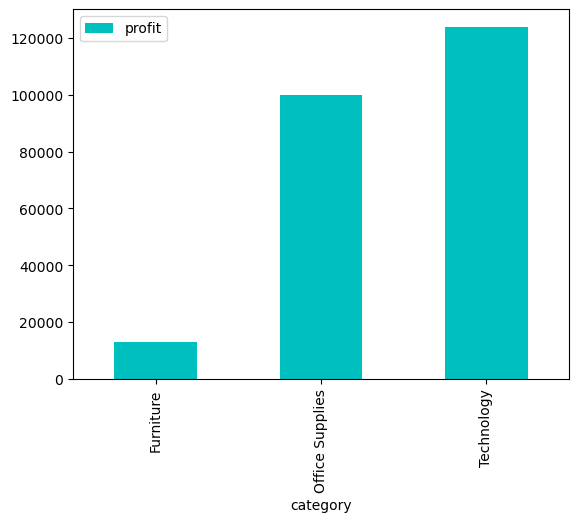

In [34]:
category_profits.plot(x=category_profits.index, y=category_profits.values, kind='bar', color='c', legend=True)
plt.show()

In [35]:
full_df.sub_category.unique()

array(['Labels', 'Bookcases', 'Phones', 'Machines', 'Accessories',
       'Storage', 'Art', 'Paper', 'Binders', 'Furnishings', 'Chairs',
       'Envelopes', 'Appliances', 'Tables', 'Supplies', 'Fasteners',
       'Copiers'], dtype=object)

In [36]:
full_df.sub_category.value_counts()

sub_category
Binders        1233
Paper          1097
Furnishings     773
Phones          718
Storage         669
Art             632
Accessories     627
Chairs          488
Appliances      373
Labels          288
Tables          248
Envelopes       200
Bookcases       191
Fasteners       167
Supplies        150
Machines         89
Copiers          58
Name: count, dtype: int64

In [37]:
sub_category_profit = full_df.groupby('sub_category')['profit'].sum()
sub_category_profit

sub_category
Accessories    35533.9207
Appliances     15678.5055
Art             5120.9839
Binders        25482.0473
Bookcases      -3126.3853
Chairs         19635.1193
Copiers        52704.8816
Envelopes       5468.6979
Fasteners        770.9599
Furnishings    11086.2517
Labels          4260.2498
Machines        3015.5880
Paper          27682.5479
Phones         32707.7253
Storage        17112.5476
Supplies       -1679.1551
Tables        -14601.4384
Name: profit, dtype: float64

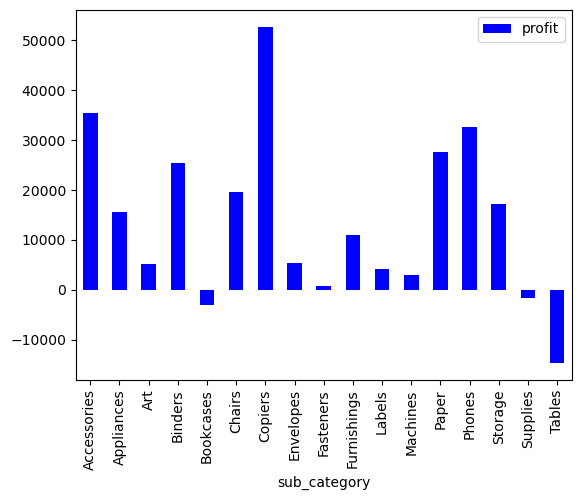

In [38]:
sub_category_profit.plot(x=sub_category_profit.index, y=sub_category_profit.values, kind='bar', color='b', legend=True)
plt.show()

In [39]:
full_df.head(3)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,returned,person
0,213,CA-2015-146262,02-01-2015,09-01-2015,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,Ohio,44256,East,OFF-LA-10004544,Office Supplies,Labels,Avery 505,23.680,2,0.2,8.8800,Yes,Chuck Magee
1,214,CA-2015-146262,02-01-2015,09-01-2015,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,Ohio,44256,East,FUR-BO-10004695,Furniture,Bookcases,O'Sullivan 2-Door Barrister Bookcase in Odessa...,452.450,5,0.5,-244.3230,Yes,Chuck Magee
2,215,CA-2015-146262,02-01-2015,09-01-2015,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,Ohio,44256,East,TEC-PH-10002844,Technology,Phones,Speck Products Candyshell Flip Case,62.982,3,0.4,-14.6958,Yes,Chuck Magee


In [40]:
top_customers = full_df.groupby('customer_name')['sales'].sum().sort_values(ascending=False).head(10)
top_customers

customer_name
Tamara Chand          18429.900
Raymond Buch          15117.339
Tom Ashbrook          13807.770
Adrian Barton         13365.911
Christopher Conant    12129.072
Sanjit Engle          11938.708
Caroline Jumper       11164.974
Hunter Lopez          10979.108
Todd Sumrall          10639.149
Seth Vernon           10270.480
Name: sales, dtype: float64

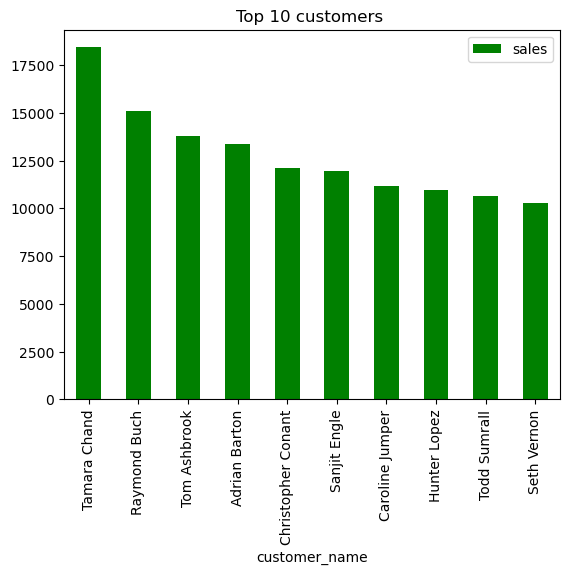

In [41]:
top_customers.plot(x=top_customers.index, y=top_customers.values, kind='bar', color = 'green', legend=True, title="Top 10 customers ")
plt.show()

In [42]:
full_df.segment.unique()

array(['Corporate', 'Consumer', 'Home Office'], dtype=object)

In [43]:
full_df.segment.value_counts()

segment
Consumer       4121
Corporate      2409
Home Office    1471
Name: count, dtype: int64

In [44]:
top_contributer = full_df.groupby('segment')[['sales', 'profit']].sum()
top_contributer

,sales,profit
segment,,
Consumer,895304.5324,109799.3588
Corporate,577711.4931,78465.8571
Home Office,339937.3367,48587.8317


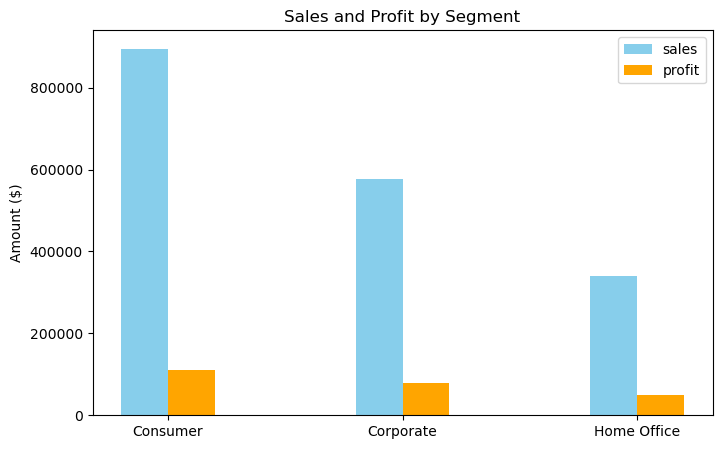

In [45]:
segments = top_contributer.index
sales = top_contributer['sales'].values
profits = top_contributer['profit'].values

x = np.arange(len(segments))
width_len = 0.2

fig, ax = plt.subplots(figsize= (8,5))
ax.bar(x - width_len/2, sales, width_len, label= "sales", color='skyblue')
ax.bar(x + width_len/2, profits, width_len, label= "profit", color='orange')

ax.set_xticks(x)
ax.set_xticklabels(segments)
ax.set_ylabel("Amount ($)")
ax.set_title("Sales and Profit by Segment")
ax.legend()

plt.show()